In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [8]:
file_path = 'datasets/wates_prepared.csv'
df = pd.read_csv(file_path)

In [9]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
# Ubah kolom "Tanggal" menjadi tipe data datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
# # Tambahkan kolom "Weekend" yang menunjukkan apakah hari tersebut weekend atau tidak
# df['Weekend'] = (df['Tanggal'].dt.dayofweek >= 5).astype(int)
df = df.dropna(subset=['Jumlah Transaksi_1month'])

# Tambahkan kolom "Hari" yang menunjukkan hari dalam seminggu
df['Hari'] = df['Tanggal'].dt.dayofweek

# Pilih fitur-fitur yang relevan
features = df[['Shift', 'Hari','Jumlah Transaksi_1month','Subtotal_1month']]

In [11]:
# Pilih fitur-fitur yang relevan
features = df[['Shift', 'Hari', 'Jumlah Transaksi_1month', 'Subtotal_1month']]

# Normalisasi data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

# Pisahkan data menjadi set pelatihan (train) dan set pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data[:, :-1], scaled_data[:, -1], test_size=0.2, random_state=42
)

# Reshape input untuk RNN
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Buat model RNN sederhana menggunakan TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(100, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi performa model pada set pengujian
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], X_test.shape[2]), y_pred.reshape(y_pred.shape[0], 1)), axis=1))[:, -1]
y_test_original = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], X_test.shape[2]), y_test.reshape(y_test.shape[0], 1)), axis=1))[:, -1]

mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Epoch 1/12

34/34 [==============================] - 2s 15ms/step - loss: 0.0311 - val_loss: 0.0097
Epoch 2/12
34/34 [==============================] - 0s 7ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 3/12
34/34 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 4/12
34/34 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 5/12
34/34 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 6/12
34/34 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0042
Epoch 7/12
34/34 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 8/12
34/34 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0038
Epoch 9/12
34/34 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 10/12
34/34 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 11/12
34/3

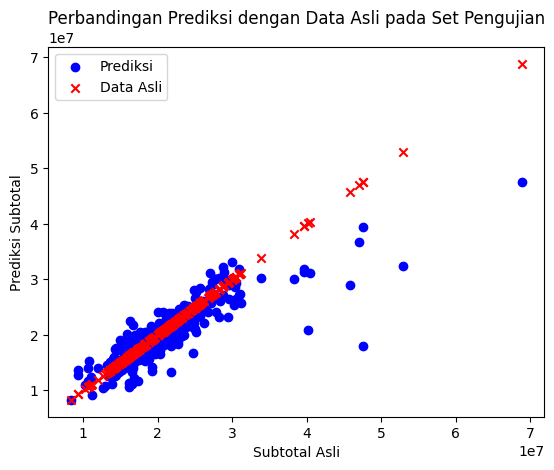

In [13]:
# Menampilkan plot perbandingan antara prediksi dan data asli pada set pengujian
plt.scatter(y_test_original, y_pred, c='blue', label='Prediksi')
plt.scatter(y_test_original, y_test_original, c='red', marker='x', label='Data Asli')
plt.xlabel("Subtotal Asli")
plt.ylabel("Prediksi Subtotal")
plt.title("Perbandingan Prediksi dengan Data Asli pada Set Pengujian")
plt.legend()
plt.show()